---

###Churn Prediction with Artificial Neural Networks (ANN)

---

#### **1. Importing Libraries**
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```
- **`numpy`**: A fundamental library for numerical computations in Python, used for working with arrays and performing mathematical operations.
- **`pandas`**: A powerful data manipulation library, used to read datasets and perform data cleaning and transformation.
- **`matplotlib` & `seaborn`**: Libraries for data visualization. `matplotlib` is used to create various plots, and `seaborn` provides a higher-level interface for drawing attractive statistical plots.

---

#### **2. Reading and Exploring the Dataset**
```python
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()
```
- **`pd.read_csv()`**: Reads the dataset from a CSV file. The dataset contains customer data, which is used to predict whether a customer will churn.
- **`dataset.head()`**: Displays the first few rows of the dataset to inspect the structure and understand the data.

---

#### **3. Splitting the Dataset into Features and Target Variable**
```python
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]
```
- **`X`**: Independent features (or predictors). These are the input variables that the model uses to make predictions.
- **`y`**: Dependent feature (or target variable), which indicates whether a customer churned or not (binary classification: `1` for churn, `0` for no churn).

---

#### **4. Feature Engineering**
```python
geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)
```
- **One-hot Encoding**: Converts categorical variables (`Geography`, `Gender`) into a series of binary columns. For example, if the customer is from a specific geography, the corresponding column will have a `1`; otherwise, `0`.
- **`drop_first=True`**: Drops the first category to avoid multicollinearity (the dummy variable trap), ensuring that one feature can be inferred from the others.
- **`.astype(int)`**: Converts the encoded values to integers (`1` and `0`).

```python
X = X.drop(['Geography', 'Gender'], axis=1)
X = pd.concat([X, geography, gender], axis=1)
```
- After encoding, the original `Geography` and `Gender` columns are dropped, and the newly encoded columns are concatenated to the features (`X`).

---

#### **5. Splitting the Dataset into Training and Testing Sets**
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```
- **`train_test_split()`**: Splits the dataset into training and testing sets.
  - **Training set**: Used to train the model.
  - **Test set**: Used to evaluate the model’s performance on unseen data.
- **`test_size=0.2`**: 20% of the data is used for testing, and 80% for training.

---

#### **6. Feature Scaling**
```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
```
- **Feature Scaling**: Normalizing features to have zero mean and unit variance. This is essential when using machine learning algorithms like neural networks, as it ensures that all features contribute equally to the learning process.
- **`StandardScaler`**: Scales the data such that each feature has a mean of 0 and a standard deviation of 1.
- **`fit_transform()`**: Fits the scaler on the training data and transforms it.
- **`transform()`**: Applies the same scaling transformation to the test data.

---

#### **7. Building the ANN Model**
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```
- **`Sequential()`**: A linear stack of layers where each layer has exactly one input tensor and one output tensor.
- **`Dense`**: Fully connected layers where every neuron in a layer is connected to every neuron in the previous layer.

```python
classifier = Sequential()
classifier.add(Dense(units=11, activation='relu'))
```
- **Input Layer**: The input layer has 11 neurons (corresponding to the number of features in `X`). The **ReLU (Rectified Linear Unit)** activation function is used to introduce non-linearity.

```python
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
```
- **Hidden Layers**: These layers allow the model to learn complex relationships and patterns in the data.
  - The first hidden layer has 7 neurons, and the second one has 6 neurons, both using the **ReLU** activation function to introduce non-linearity.

```python
classifier.add(Dense(1, activation='sigmoid'))
```
- **Output Layer**: The output layer has one neuron with a **sigmoid activation function**, which produces a probability value between 0 and 1 (binary classification).

---

#### **8. Compiling the Model**
```python
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
```
- **Optimizer**: The **Adam optimizer** is used for training the neural network. It adapts the learning rate during training, improving convergence speed and stability.
- **Loss Function**: **Binary cross-entropy** is used because the task is binary classification (churn vs. non-churn).
- **Metrics**: **Accuracy** is used to evaluate the performance of the model.

---

#### **9. Early Stopping Callback**
```python
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
```
- **Early Stopping**: This callback stops training when the validation loss stops improving. It helps prevent overfitting by halting training before the model starts to memorize the data.
  - **`monitor="val_loss"`**: Stops when the validation loss does not improve.
  - **`patience=20`**: Allows the model to continue training for 20 epochs without improvement before stopping.

---

#### **10. Training the Model**
```python
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)
```
- **`fit()`**: Trains the model on the training data (`X_train`, `y_train`).
  - **`validation_split=0.33`**: 33% of the training data is used for validation to evaluate the model's performance during training.
  - **`batch_size=10`**: The model is updated after every 10 samples.
  - **`epochs=1000`**: The model will train for 1000 epochs, but early stopping may halt it earlier if the validation loss stops improving.

---

#### **11. Plotting the Training History (Accuracy and Loss)**
```python
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.show()
```
- This plot visualizes how the model’s training and validation accuracy change over epochs. It helps identify whether the model is overfitting or underfitting.
  
```python
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
```
- This plot shows how the model's training and validation loss decrease over time. A decreasing loss indicates that the model is improving.

---

#### **12. Predictions and Model Evaluation**
```python
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
```
- **Predictions**: The model's output is a probability, and it is converted into a binary classification (`1` for churn, `0` for no churn) using a threshold of `0.5`.

```python
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
```
- **Confusion Matrix**: The confusion matrix provides a breakdown of the model’s predictions:
  - **True Positives (TP)**: Correctly predicted churn cases.
  - **False Positives (FP)**: Incorrectly predicted churn cases.
  - **True Negatives (TN)**: Correctly predicted non-churn cases.
  - **False Negatives (FN)**: Incorrectly predicted non-churn cases.

```python
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score
```
- **Accuracy Score**: Measures how well the model performs. It’s the ratio of correct predictions (TP + TN) to the total number of predictions. In this case, the model achieved an **accuracy of 0.858**, or **85.8%**, on the test data. This means that the model correctly predicted churn or non-churn for 85.8% of the test set.

---

#### **13. Retrieving Model Weights**
```python
classifier.get_weights()
```
- **Model Weights**: This retrieves the learned weights of the neural network, which are used to make predictions. These weights are optimized during training to minimize the loss function.

---

### **Conclusion**

This project demonstrates how to use a neural network to predict customer churn, involving data preprocessing, feature scaling, model building, and evaluation. The use of **early stopping**, **Adam optimizer**, and **binary cross-entropy loss** ensures efficient training and prevents overfitting.

- **Model Performance**: The final model achieved an **accuracy of 85.8%**, indicating a solid performance in predicting customer churn.
- Further improvements could involve hyperparameter tuning, using advanced regularization techniques, and exploring different machine learning models for better performance.

---

In [1]:
#Importing necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
##Divide the dataset into dep and ind features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [6]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [7]:
#concatenate these with the dataframe.
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
#Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train.shape

(8000, 11)

In [13]:
## Now lets Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [14]:
#Lets Initialize the ANN
classifier = Sequential()

In [15]:
#Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))

In [16]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [17]:
## Adding the 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))


In [18]:
## finally adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [19]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)



In [20]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [22]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 6ms/step - loss: 0.4249 - accuracy: 0.8093 - val_loss: 0.3845 - val_accuracy: 0.8338
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3705 - accuracy: 0.8431 - val_loss: 0.3800 - val_accuracy: 0.8406
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3610 - accuracy: 0.8494 - val_loss: 0.3621 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3493 - accuracy: 0.8578 - val_loss: 0.3683 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8563 - val_loss: 0.3648 - val_accuracy: 0.8519
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8614 - val_loss: 0.3682 - val_accuracy: 0.8478
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8572 - val_loss: 0.3582 - val_accuracy:

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

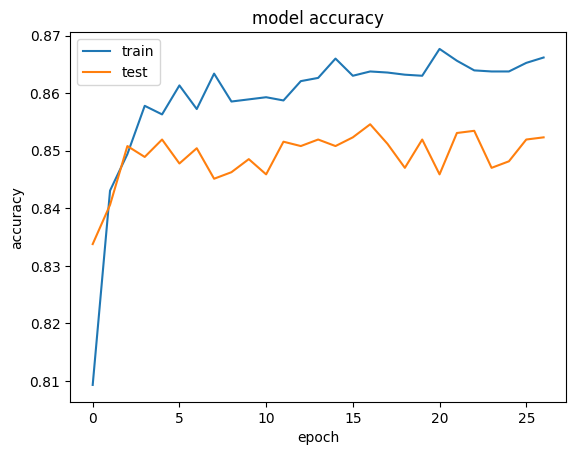

In [24]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.xlabel('epoch')
plt.show()

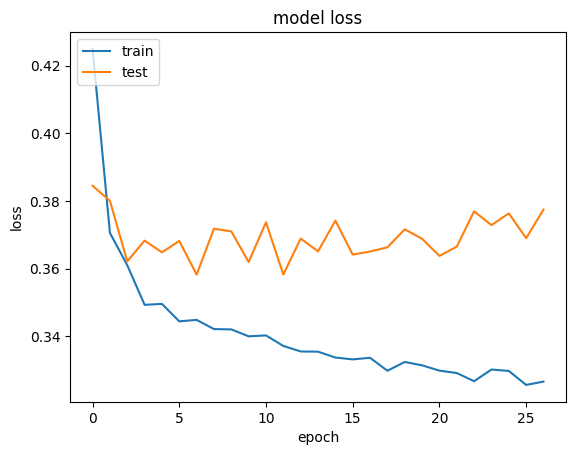

In [25]:
#summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [26]:
#Predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [27]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1535,   60],
       [ 224,  181]])

In [28]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.858

In [29]:
#get the weights
classifier.get_weights()

[array([[-0.3403183 , -0.3218894 , -0.68590146, -0.6831389 ,  0.33566338,
         -0.563923  ,  0.21610686,  0.21402983, -0.13464819, -0.33083478,
         -0.25312445],
        [-0.24002984, -0.41520575,  2.393487  , -1.2517412 , -2.0233057 ,
          0.8592828 , -0.27788094, -2.5998697 , -2.7751505 ,  0.83280075,
          1.1516263 ],
        [-0.8464589 , -1.242517  , -0.08305169, -0.15089089,  0.5937392 ,
         -0.33232978,  0.9860173 , -0.05006609, -0.6766894 ,  0.02210866,
         -0.23870745],
        [-1.8189386 ,  2.701123  ,  0.21751955, -0.22193277, -0.16924721,
         -1.2127522 , -1.8346145 ,  0.14050135,  0.45975882,  1.0279826 ,
         -0.8863763 ],
        [-0.18156767, -0.06763653, -0.4410173 ,  0.49825493,  0.38644233,
         -3.5638127 ,  0.0580758 , -1.6365981 , -0.3643821 ,  2.8044338 ,
         -0.02732267],
        [ 0.46594104,  0.31862792,  0.16803366, -0.7203211 ,  0.6695467 ,
          0.06482504, -0.9929451 , -0.48258555,  0.45146176, -0.0740143